In [1]:
import os
import pickle
import pandas as pd
import torch

In [2]:
# 피클 파일
path = ".\\data\\txt_pkl_v3\\txt_pkl_v3\\"
data_list = os.listdir(path)
len(data_list)

data_dict = {}


for data_name in data_list:
    with open(path + data_name, 'rb') as f:
        data_dict[data_name] = pickle.load(f)

In [3]:
data_dict.keys()

dict_keys(['20171115.pkl', '20171116.pkl', '20171117.pkl', '20171120.pkl', '20171121.pkl', '20171122.pkl', '20171123.pkl', '20171124.pkl', '20171127.pkl', '20171128.pkl', '20171129.pkl', '20171130.pkl', '20171201.pkl', '20171204.pkl', '20171205.pkl', '20171206.pkl', '20171207.pkl', '20171208.pkl', '20171211.pkl', '20171212.pkl', '20171213.pkl', '20171214.pkl', '20171215.pkl', '20171218.pkl', '20171219.pkl', '20171220.pkl', '20171221.pkl', '20171222.pkl', '20171226.pkl', '20171227.pkl', '20171228.pkl', '20180102.pkl', '20180103.pkl', '20180104.pkl', '20180105.pkl', '20180108.pkl', '20180109.pkl', '20180110.pkl', '20180111.pkl', '20180112.pkl', '20180115.pkl', '20180116.pkl', '20180117.pkl', '20180118.pkl', '20180119.pkl', '20180122.pkl', '20180123.pkl', '20180124.pkl', '20180125.pkl', '20180126.pkl', '20180129.pkl', '20180130.pkl', '20180131.pkl', '20180201.pkl', '20180202.pkl', '20180204.pkl', '20180205.pkl', '20180206.pkl', '20180207.pkl', '20180208.pkl', '20180209.pkl', '20180212.pkl

## supervised_dataset 만들기

1. 키값을 가져옴
2. day 설정
3. day에 해당하는 수익률 가져오기

In [4]:
# 일자에 맞는 데이터 셋을 찾는 코드입니다.
# def make_sup_data(data, day):


In [5]:
imp_data = pd.concat([data_dict['20171115.pkl'].iloc[:, 0], data_dict['20171115.pkl'].iloc[:, 5]], axis=1)

In [6]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [7]:
imp_data

,텍스트,4
주가번호,,
383646,기업은행: 2017년(E) 지배주주순이익 +30.2%yoy인 1.51조원을 예상한...,0.012959
383617,"막연한 우려 대비 견조한 펀더멘탈3분기 지배순익 2,152억원(YoY +115.1%...",0.038748
383236,실적 Review2017.11.15 What’s new : 제일제당의 삼성생명 지분...,0.038748
383453,이제는 내년 소비재 주가상승 기대감으로 매수 Nov 201715 ▶ Highligh...,0.038748
383647,기업은행: 2017년(E) 지배주주순이익 +30.2%yoy인 1.51조원을 예상한...,0.043478
...,...,...
383209,"Results Comment 104,00071,400 투자의견 BUY, 목표주가 1...",0.092033
383195,"3분기 실적 리뷰: 시장 기대치 상회 3분기 연결 매출 5,693원(YoY +224...",0.092033
383305,"- 국내 턴어라운드는 시장의 기대보다 가파른 상황이며, Acushnet와 USA도 ...",0.092033


In [8]:
imp_data.loc[:, 4]

주가번호
383646    0.012959
383617    0.038748
383236    0.038748
383453    0.038748
383647    0.043478
            ...   
383209    0.092033
383195    0.092033
383305    0.092033
383293    0.092033
383594   -0.090173
Name: 4, Length: 261, dtype: object

In [9]:
pd.DataFrame(imp_data.iloc[:, 1])

,4
주가번호,
383646,0.012959
383617,0.038748
383236,0.038748
383453,0.038748
383647,0.043478
...,...
383209,0.092033
383195,0.092033
383305,0.092033


In [20]:
imp_data.iloc[154]

텍스트    - 중국에서 체질개선을 통해 영업 레버리지가 확대될 수 있을 것으로 전망하며, 베트...
4                                                    0.0
Name: 383343, dtype: object

In [22]:
similar = cosine_similarity(pd.DataFrame(imp_data.iloc[:, 1]), pd.DataFrame(imp_data.iloc[:, 1]))

In [21]:
similar_100 = cosine_similarity(pd.DataFrame(imp_data.iloc[:, 1])*100, pd.DataFrame(imp_data.iloc[:, 1])*100)

In [31]:
impii = pd.DataFrame(imp_data.iloc[:, 1])*100

In [43]:
from scipy import stats


In [46]:
imp_data

,텍스트,4
주가번호,,
383646,기업은행: 2017년(E) 지배주주순이익 +30.2%yoy인 1.51조원을 예상한...,0.012959
383617,"막연한 우려 대비 견조한 펀더멘탈3분기 지배순익 2,152억원(YoY +115.1%...",0.038748
383236,실적 Review2017.11.15 What’s new : 제일제당의 삼성생명 지분...,0.038748
383453,이제는 내년 소비재 주가상승 기대감으로 매수 Nov 201715 ▶ Highligh...,0.038748
383647,기업은행: 2017년(E) 지배주주순이익 +30.2%yoy인 1.51조원을 예상한...,0.043478
...,...,...
383209,"Results Comment 104,00071,400 투자의견 BUY, 목표주가 1...",0.092033
383195,"3분기 실적 리뷰: 시장 기대치 상회 3분기 연결 매출 5,693원(YoY +224...",0.092033
383305,"- 국내 턴어라운드는 시장의 기대보다 가파른 상황이며, Acushnet와 USA도 ...",0.092033


In [50]:
impii

,4
주가번호,
383646,1.295896
383617,3.874758
383236,3.874758
383453,3.874758
383647,4.347826
...,...
383209,9.203297
383195,9.203297
383305,9.203297


TypeError: scatter() missing 1 required positional argument: 'y'

In [34]:
print(impii.corr())

Empty DataFrame
Columns: []
Index: []


C:\Users\user\AppData\Local\Temp\ipykernel_40504\1006559501.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(impii.corr())


In [ ]:
similar_100 = cosine_similarity(pd.DataFrame(imp_data.iloc[:, 1])*100, pd.DataFrame(imp_data.iloc[:, 1])*100)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
similar.std()

0.9655172128107791

<Axes: >

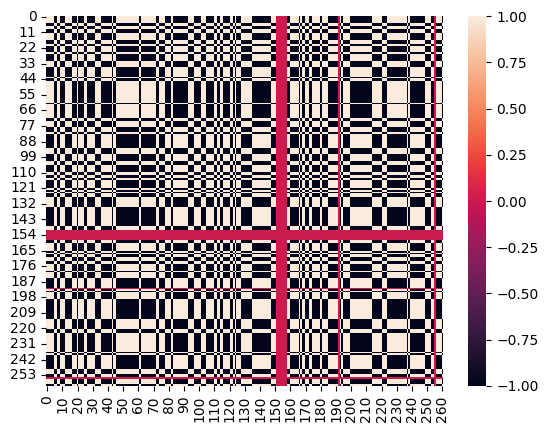

In [27]:
sns.heatmap(similar_100)


<Axes: >

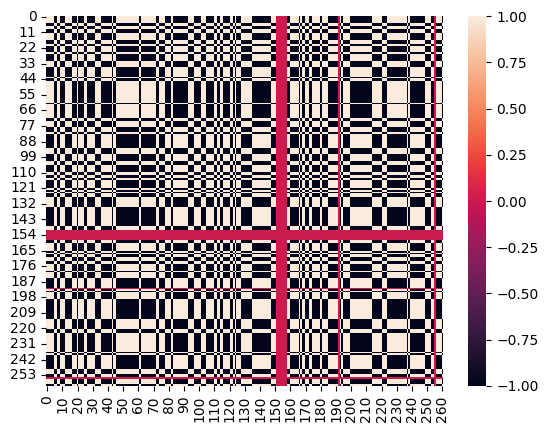

In [28]:
sns.heatmap(similar)


In [18]:
similar[154]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.